/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must

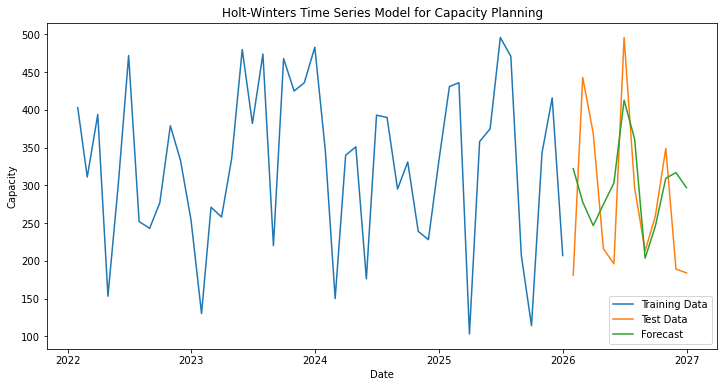

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate random data for capacity planning
np.random.seed(1234)
data = pd.DataFrame(np.random.randint(100, 500, size=(60,1)), columns=["capacity"])
data.index = pd.date_range(start="2022-01-01", periods=len(data), freq="M")

# Split data into training and testing sets
train_data = data.iloc[:-12] # Use first 80% of data for training
test_data = data.iloc[-12:] # Use last 20% of data for testing

# Build Holt-Winters model
model = ExponentialSmoothing(train_data, seasonal_periods=12, trend='add', seasonal='add')
fitted_model = model.fit()

# Make predictions for future periods
forecast_data = fitted_model.forecast(12)

# Plot training and test data, and model predictions
plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data.values, label="Training Data")
plt.plot(test_data.index, test_data.values, label="Test Data")
plt.plot(forecast_data.index, forecast_data.values, label="Forecast")
plt.legend()
plt.title("Holt-Winters Time Series Model for Capacity Planning")
plt.xlabel("Date")
plt.ylabel("Capacity")
plt.show()